In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util
from mejiro.plots import corner

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


100%|██████████| 158/158 [00:02<00:00, 70.17it/s]


In [3]:
high_snr = [l for l in all_lenses if l.snr > 50]  #  and l.get_einstein_radius() > 0.5
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, rgb_bands=pipeline_params['rgb_bands'], model=False)[2] for uid in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))

Count: 18
('snrs=[53.41076078386583, 58.53208834458984, 59.75902920468377, '
 '71.7494780194019, 99.15299066717549, 80.01516626419838, 69.11263043584809, '
 '96.04697199831355, 65.57969763669453, 88.05293095818692, 58.973019326013244, '
 '66.30160000304447, 124.51895211774352, 72.46132834271894, 81.5963593316233, '
 '54.421808048429334, 62.45995371266339, 108.8435676784629]')


AssertionError: Exposure files for StrongLens 00000101 not found in /data/bwedig/mejiro/pipeline_dev/04.

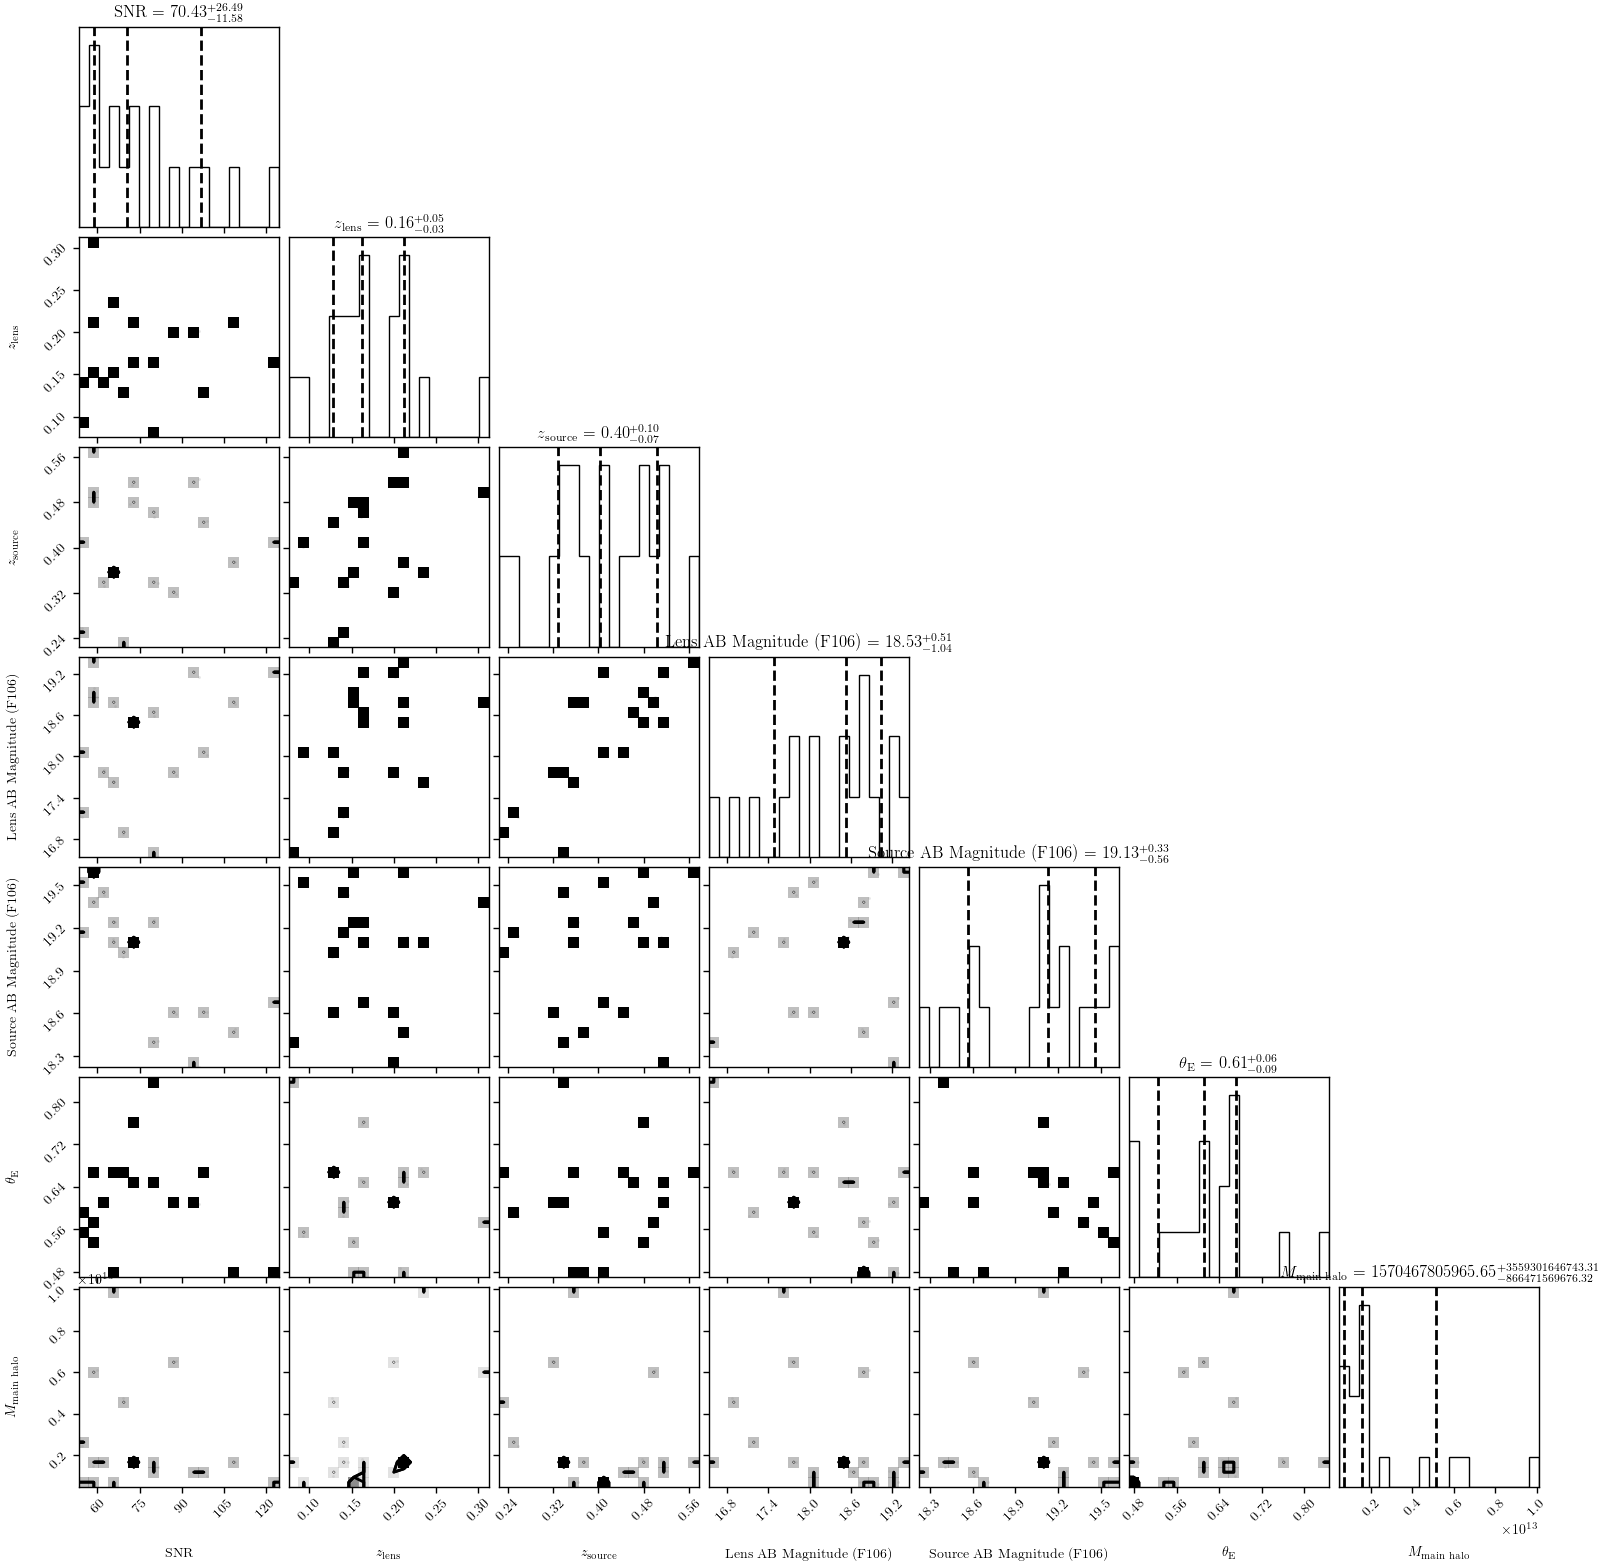

In [4]:
corner.system(high_snr, band='F106')